CMP6202

# Objectives
In this lab you will implement:
* RandomForest
* LogisticRegression
* Support Vector Machine
* Over_Sampling - SMOTE
* Under_Sampling - TomeLinks



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# [wine.csv](https://moodle.bcu.ac.uk/mod/folder/view.php?id=8621772)

In [7]:
wine = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/wine.csv')


In [8]:
wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,Low
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,Low
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,Low
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low


In [9]:
wine.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type', 'quality_ind'],
      dtype='object')

In [10]:
wine.drop ('Unnamed: 0', axis=1, inplace=True)

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
 13  quality_ind           6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [12]:
wine.drop(columns=['type', 'quality_ind'], axis=1, inplace=True)

In [13]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
wine.isna().sum()

,0
fixed.acidity,0
volatile.acidity,0
citric.acid,0
residual.sugar,0
chlorides,0
free.sulfur.dioxide,0
total.sulfur.dioxide,0
density,0
pH,0
sulphates,0


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


<Axes: xlabel='quality', ylabel='count'>

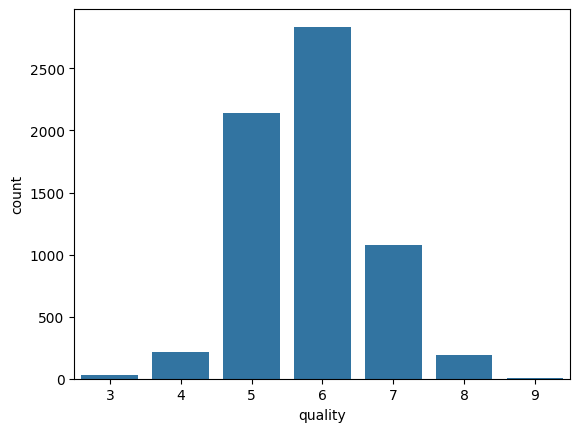

In [16]:
sns.countplot(data = wine, x ='quality')

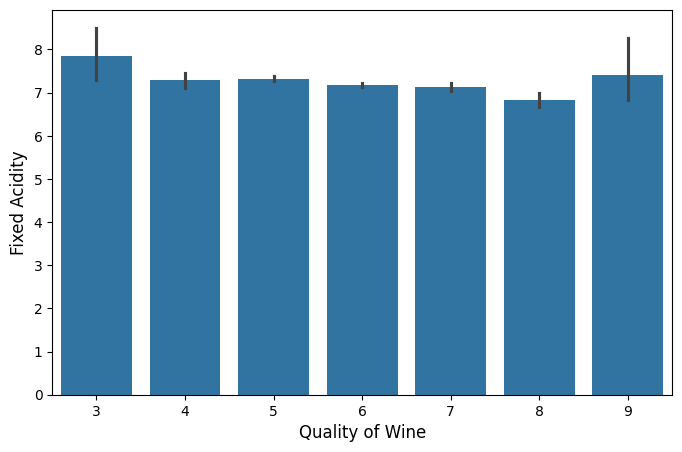

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='fixed.acidity',
            data= wine)

plt.xlabel('Quality of Wine', size = 12)
plt.ylabel('Fixed Acidity', size=12)
plt.show()

### Visualize the relationship between residual sugar and quality of wine

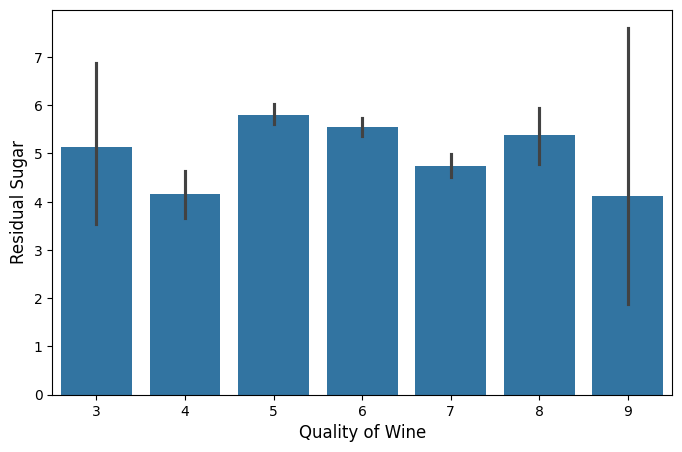

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality',
y='residual.sugar',
data=wine)
plt.xlabel('Quality of Wine', size=12)
plt.ylabel('Residual Sugar', size=12)
plt.show()

##  Visualize the relationship between chlorides and quality of wine.

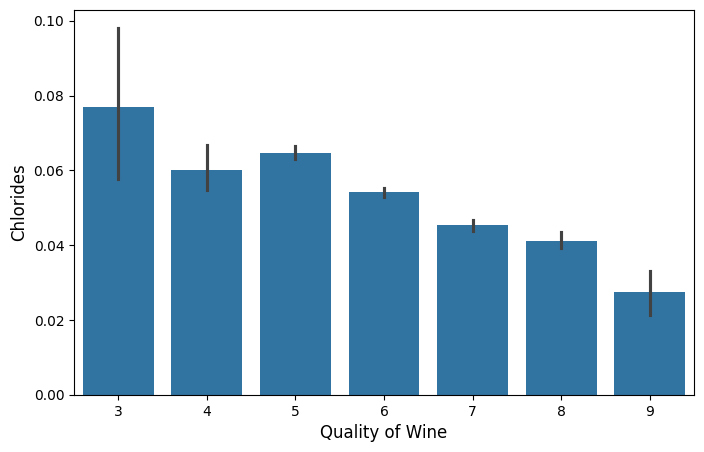

In [19]:
plt.figure(figsize= (8,5))
sns.barplot(x = 'quality',
y='chlorides',
data=wine)
plt.xlabel('Quality of Wine', size =12)
plt.ylabel('Chlorides', size=12)
plt.show()

### Classify win quality into classes of poor and good by assigning ranges for␣ the quality scores
# Wines that have a quality score between 3 and 6 are classified as 0 ('poor').Wines that have a quality score between 7 and 8 are classified as 1 ('good').

In [20]:
wine['quality'] = wine['quality'].replace([3,4,5,6], 0)
wine['quality'] = wine['quality'].replace([7,8,9], 1)

In [21]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [22]:
wine['quality'].value_counts()


,count
quality,
0,5220
1,1277


<Axes: xlabel='quality', ylabel='count'>

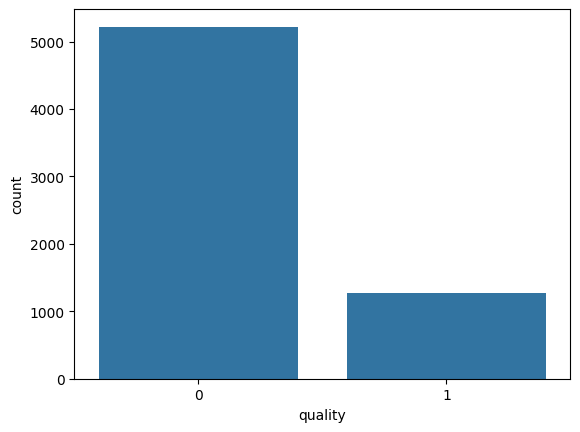

In [23]:
sns.countplot(data = wine, x = 'quality')

In [24]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
1916,6.6,0.25,0.36,8.1,0.045,54.0,180.0,0.99580,3.08,0.42,9.2
947,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36,10.0
877,6.0,0.28,0.34,1.6,0.119,33.0,104.0,0.99210,3.19,0.38,10.2
2927,7.0,0.31,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0
6063,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4


In [27]:
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)

In [29]:
X_test = sc.transform(X_test)

In [30]:
X_train

array([[-0.47810509, -0.54303355,  0.27985521, ..., -0.86006706,
        -0.75122123, -1.08506915],
       [ 0.97505476, -1.08615999,  0.21093574, ..., -1.60531829,
        -1.14846347, -0.41405807],
       [-0.93699767, -0.3619914 ,  0.14201627, ..., -0.17692009,
        -1.01604939, -0.24630531],
       ...,
       [ 4.72267752, -0.42233878,  2.07176137, ..., -0.3632329 ,
         0.90395477, -0.66568723],
       [ 1.28098315,  0.36217719,  1.31364722, ...,  0.63043542,
         2.4267167 ,  2.43773898],
       [ 0.66912637, -0.42233878,  0.21093574, ...,  0.00939272,
         0.63912661, -0.07855254]])

In [31]:
X_test

array([[-0.1721767 , -0.54303355,  0.90013042, ..., -0.3632329 ,
        -0.35397899,  1.17959322],
       [ 0.28671589, -1.20685476,  2.89879498, ..., -0.92217133,
        -0.88363531,  0.256953  ],
       [-0.78403347, -1.14650738, -0.34042   , ..., -0.61164998,
        -1.01604939, -1.16894553],
       ...,
       [ 0.51616218, -0.12060187,  1.31364722, ..., -1.10848414,
         3.61844342, -1.08506915],
       [ 0.21023379,  1.14669317, -1.78772882, ...,  1.00306103,
         0.37429845,  0.17307661],
       [ 0.05726959,  1.0259984 , -0.96069521, ...,  1.87252081,
         1.30119701, -0.83343999]])

# Classification Algorithms

## [RandomForest Model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [32]:
clf_rf = RandomForestClassifier(n_estimators=200)

In [33]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
y_pred = clf_rf.predict(X_test)

In [35]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [36]:
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.8830769230769231


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1047
           1       0.82      0.51      0.63       253

    accuracy                           0.88      1300
   macro avg       0.86      0.74      0.78      1300
weighted avg       0.88      0.88      0.87      1300



## [Logistic Regession Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [38]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)
print(classification_report(y_test, y_pred))


0.8161538461538461
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1047
           1       0.56      0.24      0.34       253

    accuracy                           0.82      1300
   macro avg       0.70      0.60      0.62      1300
weighted avg       0.79      0.82      0.79      1300



## [Support Vector Machine Model](https://scikit-learn.org/stable/modules/svm.html)

In [39]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
print(svm_acc)
print(classification_report(y_test, y_pred))


0.8338461538461538
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1047
           1       0.67      0.29      0.40       253

    accuracy                           0.83      1300
   macro avg       0.76      0.63      0.65      1300
weighted avg       0.81      0.83      0.81      1300



## [K Nearest Neighbors Model](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [40]:
clf_knn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(knn_acc)
print(classification_report(y_test, y_pred))


0.8292307692307692
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1047
           1       0.58      0.46      0.51       253

    accuracy                           0.83      1300
   macro avg       0.73      0.69      0.70      1300
weighted avg       0.82      0.83      0.82      1300



### [Naive Bayesian Classifiers](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [41]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred = clf_gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred)
print(gnb_acc)
print(classification_report(y_test, y_pred))


0.7753846153846153
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1047
           1       0.45      0.68      0.54       253

    accuracy                           0.78      1300
   macro avg       0.68      0.74      0.70      1300
weighted avg       0.82      0.78      0.79      1300



## Show the accuracy score by Model


In [42]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'KNeighbours', 'GaussianNB'],
    'Accuracy_score': [rf_acc, lr_acc, svm_acc, knn_acc, gnb_acc]
})

In [43]:
models

,Model,Accuracy_score
0,Random Forest,0.883077
1,Logistic Regression,0.816154
2,Support Vector Machine,0.833846
3,KNeighbours,0.829231
4,GaussianNB,0.775385


<Axes: xlabel='Accuracy_score', ylabel='Model'>

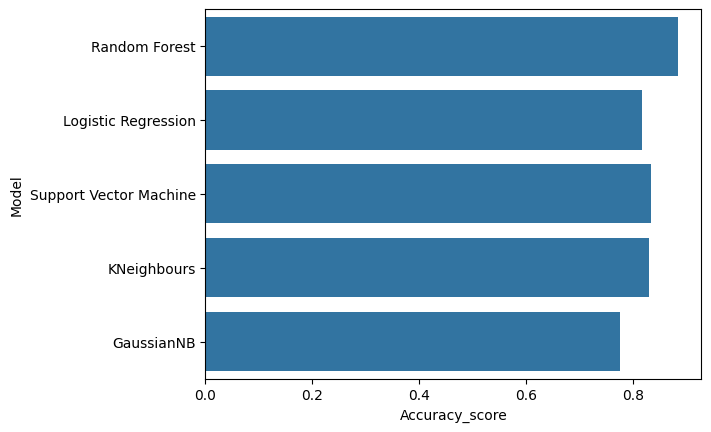

In [44]:
sns.barplot(x='Accuracy_score', y='Model', data=models)

In [45]:
models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
0,Random Forest,0.883077
2,Support Vector Machine,0.833846
3,KNeighbours,0.829231
1,Logistic Regression,0.816154
4,GaussianNB,0.775385


# KFold to perform the cross_validation
* RandomForest
* LogisticRegression
* Support Vector Machine

In [46]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [47]:
cross_val_score(RandomForestClassifier(), X_train, y_train, cv=cv)

array([0.90576923, 0.87884615, 0.875     , 0.88846154, 0.89230769,
       0.89230769, 0.86153846, 0.89402697, 0.88246628, 0.9017341 ])

In [48]:
print('Mean Accuracy : ', np.mean(cross_val_score(RandomForestClassifier(), X_train, y_train, cv=cv)))

Mean Accuracy :  0.8895553579368608


In [49]:
cross_val_score(LogisticRegression(), X_train, y_train, cv=cv)

array([0.85      , 0.79038462, 0.84807692, 0.82307692, 0.8       ,
       0.83461538, 0.79230769, 0.83622351, 0.78805395, 0.82466281])

In [50]:
print('Mean Accuracy : ', np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=cv)))

Mean Accuracy :  0.8187401808211057


In [51]:
cross_val_score(SVC(), X_train, y_train, cv=cv)

array([0.85769231, 0.80384615, 0.83846154, 0.84230769, 0.83076923,
       0.84038462, 0.80192308, 0.8477842 , 0.81888247, 0.84200385])

In [52]:
print('Mean Accuracy : ', np.mean(cross_val_score(SVC(), X_train, y_train, cv=cv)))

Mean Accuracy :  0.8324055135615829


# SMOTE

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
from collections import Counter

### Heart

### ["heart.csv"](https://moodle.bcu.ac.uk/mod/folder/view.php?id=8621772)

In [56]:
df = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/Heart.csv')

In [57]:
df.head(2)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [58]:
df.drop('Unnamed: 0', axis=1, inplace =True)

In [59]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [60]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [61]:
df = df.rename(columns={
    'AHD' : 'target'
})

In [62]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'target'],
      dtype='object')

In [63]:
df['target'] = df['target'].replace('Yes', 1)

In [64]:
df['target'] = df['target'].replace('No', 0)

In [65]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [66]:
df.shape

(303, 14)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  target     303 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 33.3+ KB


In [68]:
df['ChestPain'].value_counts()

,count
ChestPain,
asymptomatic,144
nonanginal,86
nontypical,50
typical,23


In [69]:
df['ChestPain'] = df['ChestPain'].replace('asymptomatic', 0)
df['ChestPain'] = df['ChestPain'].replace('nonanginal', 1)
df['ChestPain'] = df['ChestPain'].replace('nontypical', 2)
df['ChestPain'] = df['ChestPain'].replace('typical', 3)

In [70]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [71]:
df['Thal'].value_counts()

,count
Thal,
normal,166
reversable,117
fixed,18


In [72]:
df['Thal'] = df['Thal'].replace('normal', 0)
df['Thal'] = df['Thal'].replace('reversable', 1)
df['Thal'] = df['Thal'].replace('fixed', 2)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    float64
 13  target     303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [74]:
df.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0.0,1


In [75]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [76]:
df.describe(include = 'all')

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,0.841584,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.508306,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.608904,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [77]:
df = df.dropna()

In [78]:
df.describe(include ='all')

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,0.841751,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,0.508418,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.610242,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


In [79]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


### Imbalanced dataset

**imbalanced-learn** library (imblearn) in conjunction with scikit-learn to perform **over-sampling** and **under-sampling**.
* imbalanced-learn provides various techniques for handling imbalanced datasets, including
* [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) (Synthetic Minority Over-sampling Technique) for [over-sampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) and
* [Tomek Links](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html) for [under-sampling](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/).

In [80]:
df['target'].value_counts()

,count
target,
0,160
1,137


In [81]:
df.groupby('target').mean()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
target,,,,,,,,,,,,,
0,52.643750,0.556250,1.206250,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,0.243750
1,56.759124,0.817518,0.416058,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,0.817518


In [82]:
X = df.drop('target', axis = 1)
y = df['target']

In [83]:
X.shape

(297, 13)

In [84]:
y.shape

(297,)

In [85]:
y.value_counts()

,count
target,
0,160
1,137


### Apply Over_Sampling SMOTE()

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
over_sample = SMOTE()
X, y = over_sample.fit_resample(X, y)

In [88]:
X.shape

(320, 13)

In [89]:
y.shape

(320,)

In [90]:
type(y)

pandas.core.series.Series

**Counter** class in Python, which is part of the **collections** module, is a useful data structure for counting the occurrences of elements in an iterable, such as a list, tuple, or string.

In [91]:
counter = Counter(y)

In [92]:
print (counter)

Counter({0: 160, 1: 160})


In [93]:
y.value_counts()

,count
target,
0,160
1,160


# Apply Under_Sampling - TomekLinks

In [94]:
from imblearn.under_sampling import TomekLinks

In [95]:
X = df.drop('target', axis = 1)
y = df['target']

In [96]:
Counter(y)

Counter({0: 160, 1: 137})

In [97]:
under = TomekLinks()

In [98]:
X, y = under.fit_resample(X, y)

In [99]:
Counter(y)

Counter({0: 130, 1: 137})

### Splitting the Data into Training data & Test Data

In [100]:
X.shape

(267, 13)

In [101]:
X.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2.0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0.0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42)

In [103]:
X_train.shape

(200, 13)

In [104]:
X_test.shape

(67, 13)

### Data Standardization

In [105]:
sc = StandardScaler()

In [106]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
X_train

array([[ 0.60757374,  0.66245673, -0.84443653, ...,  0.68599434,
         0.34158727,  0.75554842],
       [ 0.38941441,  0.66245673, -0.84443653, ..., -1.02899151,
         0.34158727,  0.75554842],
       [-1.35586025,  0.66245673,  2.18946716, ..., -1.02899151,
         1.40904747, -0.86928689],
       ...,
       [-1.02862125,  0.66245673, -0.84443653, ...,  0.68599434,
        -0.72587294, -0.86928689],
       [ 0.93481274, -1.50953255, -0.84443653, ...,  0.68599434,
         2.47650767,  0.75554842],
       [-2.11941792, -1.50953255, -0.84443653, ..., -1.02899151,
        -0.72587294, -0.86928689]])

## Model Training
* Logistic Regression

In [108]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

### Model Evaluation
* Accuracy Score

In [109]:

lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

0.8656716417910447


### Building predictive Model

In [110]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

In [111]:
len(input_data)

13

In [112]:
X_train.shape

(200, 13)

In [113]:
input_data = np.array(input_data)

In [114]:
type(input_data)

numpy.ndarray

In [115]:
input_data

array([ 62. ,   0. ,   0. , 140. , 268. ,   0. ,   0. , 160. ,   0. ,
         3.6,   0. ,   2. ,   2. ])

In [116]:
input_data = input_data.reshape(1,-1)

In [117]:
input_data

array([[ 62. ,   0. ,   0. , 140. , 268. ,   0. ,   0. , 160. ,   0. ,
          3.6,   0. ,   2. ,   2. ]])

In [118]:
input_data.shape

(1, 13)

In [119]:
prediction = clf_lr.predict(input_data)

In [120]:
print(prediction)

[1]


In [121]:
if (prediction[0]==1):
  print('Heart Disease')
else:
  print('No Disease')


Heart Disease


## Another Model
* SVC

In [122]:
clf_svm = SVC(kernel = 'linear')
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
print(svm_acc)

0.8208955223880597


### Prediction

In [123]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
input_data = sc.transform(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [124]:
prediction = clf_svm.predict(input_data)
if (prediction[0]==1):
  print('Heart Disease')
else:
  print('No Disease')

Heart Disease


In [125]:
print (prediction)

[1]


# Programming Challenge!
## Balancing Imbalanced Datasets with Various Machine Learning Algorithms

#### This exercise will help to understand the practical implications of handling imbalanced data in real-world scenarios.

### Task 1: Data Loading and Exploration

* Load the dataset 'heart.csv'
* Check for class imbalance and understand the features.


## Task 2: Data Preprocessing

* Preprocess the data by handling missing values and encoding categorical features if necessary.
* Split the data into training and testing sets.

### Task 3: Random Forest Classifier

* Apply a Random Forest classifier to the imbalanced dataset without any sampling techniques.
* Evaluate the model's performance and discuss the results.

### Task 4: Logistic Regression

* Implement a Logistic Regression classifier on the imbalanced dataset.
* Evaluate the model's performance and compare it to the Random Forest results.

### Task 5: Support Vector Machine (SVM)

* Apply Support Vector Machine (SVM) classifier on the imbalanced data.
* Evaluate the SVM model's performance and compare it to the previous two models.

### Task 6: Over-sampling with SMOTE

* Apply SMOTE to balance the dataset by generating synthetic samples for the minority class.
* Train the Random Forest, Logistic Regression, and SVM models on the balanced dataset.
* Evaluate and compare the performance of these models with the original models.

### Task 7: Under-sampling with Tomek Links

* Apply Tomek Links to the imbalanced dataset to remove ambiguous instances.
* Train the Random Forest, Logistic Regression, and SVM models on the under-sampled dataset.
* Evaluate and compare the performance of these models with the original models and the SMOTE-balanced models.